# Introduction to Scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-learn library

Topics:

0. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for the problems
3. Fir the model/algorithm and use it to make predictions on the data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

# 0. An end-to-end Scikit-Learn workflow

In [21]:
# 1. get the data
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
# Create X (features matrix)
x = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [23]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=97)

# keep the default hperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 97,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [25]:
clf.fit(x_train, y_train);

In [26]:
# make a prediction
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [27]:
y_test

103    1
56     1
300    0
270    0
208    0
      ..
31     1
73     1
187    0
199    0
180    0
Name: target, Length: 61, dtype: int64

In [28]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [29]:
clf.score(x_test,y_test)

0.7868852459016393

In [30]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        25
           1       0.83      0.81      0.82        36

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [31]:
confusion_matrix(y_test,y_preds)

array([[19,  6],
       [ 7, 29]])

In [32]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [33]:
# 5. Improve the model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(75,100,2):
    print(f"Trying model with {i} estimators.. ")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%")
    print(" ")

Trying model with 75 estimators.. 
Model accuracy on test set: 78.69%
 
Trying model with 77 estimators.. 
Model accuracy on test set: 77.05%
 
Trying model with 79 estimators.. 
Model accuracy on test set: 75.41%
 
Trying model with 81 estimators.. 
Model accuracy on test set: 77.05%
 
Trying model with 83 estimators.. 
Model accuracy on test set: 78.69%
 
Trying model with 85 estimators.. 
Model accuracy on test set: 81.97%
 
Trying model with 87 estimators.. 
Model accuracy on test set: 77.05%
 
Trying model with 89 estimators.. 
Model accuracy on test set: 77.05%
 
Trying model with 91 estimators.. 
Model accuracy on test set: 77.05%
 
Trying model with 93 estimators.. 
Model accuracy on test set: 77.05%
 
Trying model with 95 estimators.. 
Model accuracy on test set: 77.05%
 
Trying model with 97 estimators.. 
Model accuracy on test set: 78.69%
 
Trying model with 99 estimators.. 
Model accuracy on test set: 77.05%
 


In [34]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model1.pkl","wb"))

In [35]:
loaded_model = pickle.load(open("random_forest_model1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.7704918032786885

## 1. Getting the data ready to be used with machine learning

Three main things to do:

    1. Split the data into features and labels ('X' and 'y')
    2. Filling (aka imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (aka feature encoding)


## 1.1 Make em all numerical

In [36]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [37]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [38]:
from sklearn.model_selection import train_test_split
# Split the data

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# Refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

### 1.2 Dealing with missing values

1. Fill them with some value (aka imputation).
2. Remove the samples with missing data altogether.

In [ ]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Create X and Y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Convert the data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

#### Option 1: Fill missing with Pandas

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the Colour column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the Odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the Doors column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [ ]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

### Option 2: Fill missing values with Scikit-learn

In [ ]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [ ]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# Split X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numberical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
categorical_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer  (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer, categorical_features),
    ("door_imputer",door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

#Transform data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.isna().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Data as numbers and filled (no missing values)
# Fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test,y_test)

## 2. Choosing the right estimator/algorithm for the problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whetehr a sample is one thing or another
* Regression - predicting a number

Step 1 - Check Scikit-Learn machine learning map.. : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem


In [41]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [42]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
# number of samples
len(boston_df)

506

In [44]:

# Try the Ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(32)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model
model.score(X_test,y_test)

0.6800552809837133

How to improve the score?
 
What if Ridge isn't working?

In [45]:
# Try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Evaluate the model
rf.score(X_test, y_test)

0.8654448653350507

### 2.2 Choosing an estimator for a classification problem

In [46]:
heart_disease = pd.read_csv("heart-disease.csv")

Consulting the map and it says to try ```LinearSVC```

In [47]:
# Import LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

/home/insaiyancvk/miniconda3/envs/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [48]:
# Import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fir the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on the data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit  the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learnt)
clf.score(X_test,y_test)

0.8524590163934426

## 3.2 Make predictions using a machine learning model 

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [50]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [51]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [52]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [53]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [54]:
clf.score(X_test,y_test)

0.8524590163934426

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [56]:
# predict_proba() returns probablities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [57]:
# predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [58]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

#Split into training and tests
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)


In [59]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [60]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [61]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## 4. Evaluating an ML model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [62]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)


RandomForestClassifier()

In [63]:
clf.score(X_train,y_train)

1.0

In [64]:
clf.score(X_test,y_test)

0.8524590163934426

Do the same but for regression 

In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

#Split into training and tests
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [66]:
model.score(X_test,y_test)

0.8654448653350507

### 4.2 Evaluating a model using `scoring` parameter

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);


In [68]:
clf.score(X_test, y_test)

0.8524590163934426

In [69]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

### 4.2.1 Classificatin model evaluation metrics

1. Accuracy
2. Area under ROC curce
3. Confusoin matric
4. Classification report

#### Accuracy

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]


clf = RandomForestClassifier()
cros_val_score = cross_val_score(clf, X, y)

In [71]:
np.mean(cros_val_score)

0.8248087431693989

In [72]:
print(f"Heart DIsease Classifier Accuracy: {np.mean(cros_val_score)*100:.2f}%")

Heart DIsease Classifier Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curce (AUC)
* ROC curve

ROC curves are a comparison of a model's truue positive rate (tpr) vs a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* Flase negative = model predicts 0 when truth is 1

In [73]:
# Create X_test etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [74]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probablities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [75]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [76]:
# Calculate fpr, tpr and thresholds
fpr,tpr, tresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

Matplotlib is building the font cache; this may take a moment.


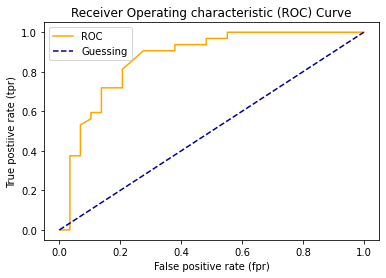

In [77]:
# Create a fuinction for p;otting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curvce(fpr,tpr):
    """
    Plots a ROC curve given the flase positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr,tpr, color="orange", label = "ROC")
    #Plot line wiht no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True postiive rate (tpr)")
    plt.title("Receiver Operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curvce(fpr,tpr)

In [78]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was suposed to predict.
In esence, giving you an idea of where the model is getting confused


In [79]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [80]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Label'],
           colnames=["Predicted LAbels"])

Predicted LAbels,0,1
Actual Label,,
0,23,6
1,6,26


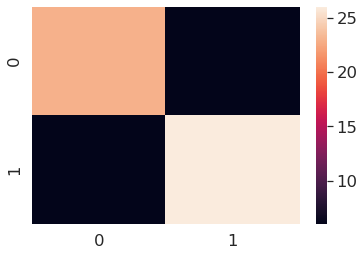

In [83]:
# Make the confusion matrix more visual with SSeaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seabor
sns.heatmap(conf_mat);

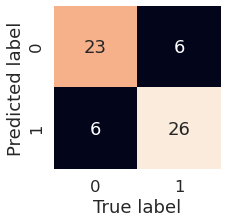

In [84]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaboorn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Anotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");

plot_conf_mat(conf_mat)

**Classification Report**

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.2.2 Regression model evaluation metrics

1. R^2 or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

what R^2 does: Compares your models' predictions to the mean of the targets. Values can range from -infinity(very poor) to 1. For ex, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And it your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [90]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
model.score(X_test,y_test)

0.8654448653350507

In [92]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [95]:
r2_score(y_test, y_test_mean)

0.0

In [96]:
r2_score(y_test,y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actualvalues. It gives you an idea of how wrong youor models predictions are

In [98]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [99]:
df = pd.DataFrame(data={"Actual values": y_test,
                       "Predicted values": y_preds})

In [103]:
df["Differences"] = df["Predicted values"]-df["Actual values"]
df

,Actual values,Predicted values,Differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared Error (MSE)**

In [104]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [106]:
# Calculate MSE 
(np.square(df["Differences"])).mean()

9.867437068627442

 ### 4.2.3 Finally using `scoring` parameter

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [108]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [110]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [112]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [114]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8209201193072161

In [115]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8484848484848484

In [116]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8455032904593217

How about the regression model?

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [120]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [119]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [122]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [125]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.729149843894373

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


### Regression evaluation functions

In [131]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442
